In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(12345)
plt.rc('figure', figsize=(10, 10))
np.set_printoptions(precision=4, threshold=15,suppress=True)

# 梯度下降法
梯度下降法(gradient descent)是一种常用的一阶(first-order)优化方法,是求解无约束问题最简单, 最经典的方法之一
## 导数与梯度
梯度定义:
$$\mathcal granf(x_0,x_1,\cdots,x_n) = \left(\frac {\partial f}{\partial x_0},\cdots,\frac {\partial f}{\partial x_j},\cdots, \frac {\partial f}{\partial x_n} \right)$$
设 $z = f(x, y)$ 在$P_0(x_0, y_0) $处存在偏导数 $f_x'(x_0,y_0)$和$f_y'(x_0,y_0)$,则称向量$\{ f_x'(x_0,y_0), f_y'(x_0,y_0) \}$ 为$f(x, y)$在$P_0(x_0, y_0) $的梯度, 记作:
$$\nabla f|_{p_0}或granf|_{p_0}$$

梯度的提出只为回答一个问题：  

　函数在变量空间的某一点处，沿着哪一个方向有最大的变化率？  
 
　梯度定义如下：  
 
　<font color='red'>函数在某一点的梯度是这样一个向量，它的方向与取得最大方向导数的方向一致，而它的模为方向导数的最大值。</font>  
 
　这里注意三点：  
 1. 梯度是一个向量， 大小:$$|\nabla f| = \sqrt {\left [ f_x'(x, y) \right ]^2 + \left[ f_y'(x, y) \right]^2}$$ 
 2. 梯度的方向是最大方向导数的方向 ,设$v=\{v_1,v_2\}(|V|=1)$是任一给定方向,则对$\nabla f$与v的夹角$\theta$有
 $$\frac {\partial f}{\partial v} |_{p_0}= f_x'(x_0, y_0)v_1 + f_y'(x_0, y_0)v_2
 = \{f_x'(x_0, y_0), f_y'(x_0, y_0)\}\cdot\{v_1, v_2\} = \nabla f|_{p_0}\cdot v = |\nabla f|_{p_0}\cos\theta
 $$
 3. 梯度的值是最大方向导数的值 : $|granf(x, y)| = \sqrt {(\frac {\partial f} {\partial x})^2 + (\frac {\partial f} {\partial y})^2}$。

设 $z = f(x, y) =xy^2$ , 求$f(x,y)$在(1, -1)处沿任意方向$v={v_1, v_2}(|V|=1)$的方向导数,  
并指出方向导数的最大值和取得最大值方向的单位向量;  
$f_x'(x, y)=y^2, f_y'(x, y)=2xy$  
$\frac {\partial f}{\partial v}|_{(1, -1)} = \{f_x'(1, -1)v_1, f_y'(1, -1)v_2 \}= v_1 - 2v_2 $  
那么$\nabla f|_{(1, -1)}=\{1, -2\}$, $|\nabla f|_{(1, -1)} = \sqrt {5}$  
取得最大方向的单位向量:
$v = \frac {\nabla f|_{(1, -1)}}{|\nabla f|_{(1, -1)}} = \{\frac {1}{\sqrt {5}}, - \frac {2}{\sqrt {5}}\}$

## 梯度下降法(Gradient Ascent)
要找到某函数的最大值，最好的方法是沿着该函数的梯度方向探寻
梯度上升算法的迭代公式如下:
$$w := w + \alpha \nabla_w f(w)$$
$\alpha$为步长,是每次移动量的大小。该公式将一直被迭代执行，直至达到某个停止条件为止，比如迭代次数达到某个指定值或者算法达到某个可以允许的误差范围。

输入: 目标函数$f(x)$, 梯度函数$g(x)=\nabla f(x), 计算精度\epsilon$
输出: $f(x)$的极小点$x^*$
## 梯度上升 or 梯度下降
其实这个两个方法在此情况下本质上是相同的。关键在于代价函数（cost function）或者叫目标函数（objective function）。如果目标函数是损失函数，那就是最小化损失函数来求函数的最小值，就用梯度下降。 如果目标函数是似然函数（Likelihood function），就是要最大化似然函数来求函数的最大值，那就用梯度上升。在逻辑回归中， 损失函数和似然函数无非就是互为正负关系。

## 批量梯度下降(Batch Gradient Descent, BGD)
批量梯度下降法是最原始的形式，它是指在每一次迭代时使用`所有样本`来进行梯度的更新
优点：  
- 一次迭代是对所有样本进行计算，此时利用矩阵进行操作，实现了并行。
- 由全数据集确定的方向能够更好地代表样本总体，从而更准确地朝向极值所在的方向。当目标函数为凸函数时，BGD一定能够得到全局最优。

缺点：
- 当样本数目 m 很大时，每迭代一步都需要对所有样本计算，训练过程会很慢。

从迭代的次数上来看，BGD迭代的次数相对较少.

## 随机梯度下降(Stochastic Gradient Descent, SGD)

梯度上升算法在每次更新回归系数时都需要遍历整个数据集($data\_mat.T \cdot error$)，该方法在处理 100 个左右的数据集时尚可，但如果有数十亿样本和成千上万的特征，那么该方法的计算复杂度就太高了。一种改进方法是`一次迭代`仅用`一个样本点`来更新回归系数，该方法称为 `随机梯度上升算法`。由于可以在新样本到来时对分类器进行增量式更新，因而随机梯度上升算法是一个在线学习(online learning)算法。与 “在线学习” 相对应，一次处理所有数据被称作是 “批处理” （batch） 。
随机梯度上升算法可以写成如下的伪代码: 

```
所有回归系数初始化为 1
对数据集中每个样本
    计算该样本的梯度
    使用 alpha x gradient 更新回归系数值
返回回归系数值
```
**优点**：
- 由于不是在全部训练数据上的损失函数，而是在每轮迭代中，随机优化某一条训练数据上的损失函数，这样每一轮参数的更新速度大大`加快`。  

**缺点**：
- 准确度下降。由于即使在目标函数为强凸函数的情况下，SGD仍旧`无法做到线性收敛`。
- 可能会收敛到`局部最优`，由于单个样本并不能代表全体样本的趋势。
- 不易于并行实现。

## 小批量梯度下降（Mini-Batch Gradient Descent, MBGD）
小批量梯度下降，是对批量梯度下降以及随机梯度下降的一个折中办法。其思想是：每次迭代 使用 **batch_size** 个样本来对参数进行更新。
这里我们假设 batchsize=10，样本数m=100, 每次$\theta$更新时:
$$\theta_j := \theta_j - \alpha \frac {1}{m}\sum_{k=i}^{i+9} \left(h_{\theta}(x^{(k)}) - y^{(k)}\right)x_j^{(k)}, \quad j=(0\ldots n) \tag {27}$$

伪代码: 
```
repeat{
    for i=1,11,21,31,...,91{
       theta 更新
    }
  }
```
优点：
- 通过矩阵运算，每次在一个batch上优化神经网络参数并不会比单个数据慢太多。
- 每次使用一个batch可以大大减小收敛所需要的迭代次数，同时可以使收敛到的结果更加接近梯度下降的效果。(比如训练样本大小为的30W，设置batch_size=100时，需要迭代3000次，远小于SGD的30W次)
- 可实现并行化。  
  
缺点：
- batch_size的不当选择可能会带来一些问题。


batcha_size的选择带来的影响：
- 在合理地范围内，增大batch_size的好处:

    * 内存利用率提高了，大矩阵乘法的并行化效率提高.
    * 跑完一次 epoch（全数据集）所需的迭代次数减少，对于相同数据量的处理速度进一步加快。
    * 在一定范围内，一般来说 Batch_Size 越大，其确定的下降方向越准，引起训练震荡越小。
- 盲目增大batch_size的坏处：
    * 内存利用率提高了，但是内存容量可能撑不住了。
    * 跑完一次 epoch（全数据集）所需的迭代次数减少，要想达到相同的精度，其所花费的时间大大增加了，从而对参数的修正也就显得更加缓慢。
    * Batch_Size 增大到一定程度，其确定的下降方向已经基本不再变化。

# 拉格朗日乘子法

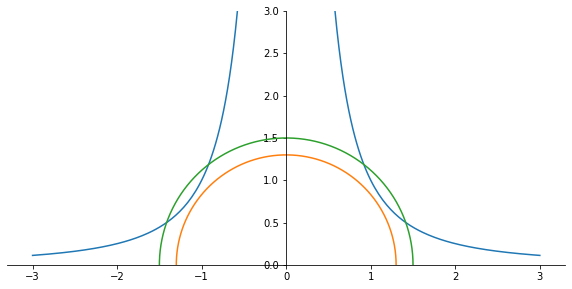

In [2]:
fig = plt.figure()
x = np.linspace(-3, 3, 256)
y = 1 / x**2
plt.ylim((0, 3))
ax = plt.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data', 0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data', 0))
ax.set_aspect(1)
plt.plot(x, y)
theta = np.linspace(0, np.pi,800)
x,y = np.cos(theta)*1.3, np.sin(theta)*1.3
plt.plot(x, y)
x,y = np.cos(theta)*1.5, np.sin(theta)*1.5
plt.plot(x, y)

例如 上图的方程$f(x, y)=x^2y$, 想要得到其上的点与原点的最短距离, 一种方法是,以原点为圆形向外画圆,第一次与曲线相交的点就是距离原点最近的点.可以得到一个规划问题:$$\begin{align} & \mathop{min}_{x,y} f(x,y)= x^2 + y^2 \\ & s.t. g(x,y)=x^2y -3=0,\end{align} $$
分析得知:
- 在极值点, 圆与曲线相切
- 梯度与等高线的切线垂直

综合可知，在相切点，圆的梯度向量和曲线的**梯度向量平行**, 可以表示为:
$$\nabla f = \lambda \nabla g \tag 9$$
故而上述问题的可表示为:$$\begin{cases}
\begin{pmatrix} 2x \\2y \end{pmatrix} = \lambda \begin{pmatrix} 2xy \\x^2 \end{pmatrix}\\
x^2y=3\end{cases}$$
这就是拉格朗日乘子法

##  定义
拉格朗日乘子法(Lagrange multipliers)是一种寻找多元函数在一组约束下的极值的方法.通过引入**拉格朗日乘子**(如上述的$\lambda$),可将有d个变量与k个约束条件的最优化问题转为具有d+k个变量的无约束优化问题求解.假定x为d维向量,要寻找x的某个取值$x^*$,使目标函数f(x)最小且同时满足g(x) = 0的约束,从几何角度看,该问题的目标是在由方程
g(x)=0确定的d-1维曲面上寻找能使目标函数f(x)最小化的点,得出以下结论:
- 对于约束曲面上的任意点x, 该点的梯度$\nabla g(x)$正交(内积为0)于约束曲面;
- 对于最优点$x^*$, 目标函数在该点的梯度$\nabla f(x^*)$正交于约束曲面.

在最优点$x^*$, 梯度$\nabla g(x^*)$与$\nabla f(x^*)$的方向必定相同或相反, 即:
$$\nabla f(x^*) + \lambda \nabla g(x^*) = 0 \tag {10}$$

定义**拉格朗日函数**, $\lambda$称为拉格朗日乘子:
$$L(x,\lambda)= f(x) + \lambda g(x) \tag {11}$$
### 无约束优化问题
考虑无约束优化问题：$$\mathop{min}_xf(x)$$根据 Fermat 定理，直接找到使目标函数得 0 的点即可 即 $\nabla_xf(x)=0$ ，如果没有解析解的话，可以使用梯度下降或牛顿方法等迭代的手段来使 x 沿负梯度方向逐步逼近极小值点
### 等式约束优化
要求函数f 在g 约束下的极值这种问题可以表示为:
$$\begin{align} & \mathop {min}_x f(x) \\ & s.t. g_i(x)=0, \quad i=1,2,\dots,m\end{align} \tag {12}$$
可以列出方程组求解
$$\begin{cases} \nabla_x L(x, \lambda) = 0\\ \nabla_{\lambda} L(x, \lambda) = 0 \end{cases} \tag {13}$$
<img src='../img/等式约束和不等式约束.png'></img>
### 不等式约束
当约束条件为$g(x)\leq0$,此时最优点$x^*$或在g(x)<0的区域中,或在边间g(x)=0上.
- 对于g(x)<0的情形,约束$g(x)  \leq 0$不起作用,可以直接通过条件$\nabla f(x) = 0$来获得最优点;这等价于将$\lambda$置零后对$\nabla_x L(x, \lambda)$置零得到最优点, 即 $\nabla_x L(x, 0) = \nabla f(x) = 0$.
- 对于g(x)=0的情形,类似等式约束的分析,此时$\nabla f(x^*)$与$\nabla g(x^*)$的方向必相反(相同的话最优点不可能在g(x)=0形成曲面内部), 即$\lambda > 0$

综合起来，必须满足$\lambda g(x)=0$, 这时候转化为：
$$\begin{cases}g(x) \leq 0; \\ \lambda \geq 0;\\ u_jg_j(x)=0\end{cases} \tag{14}$$
(14)式被称为**KKT条件**(Karush-Kuhn-Tucker).  
将其推广到具有m个等式约束和n个不等式约束的情形:
$$\begin{align} &\mathop {min}_x f(x)\\
&s.t. &h_i(x)=0, \quad i=1,2,\dots,m\\
&& g_j(x) \leq 0,\quad j=1,2,\dots,n\end{align} \tag {15}$$
$$$$
定义**广义拉格朗日函数**:
$$L(x, \lambda, \mu) = f(x) + \sum_{i=1}^{m}\lambda_ih_i(x) + \sum_{j=1}^{n}\mu_jg_j(x) \tag {16}$$
它的KKT条件($j=1,2,\dots,n$)为:
$$\begin{cases}g_j(x) \leq 0; \\ u_j \geq 0; \\ u_jg_j(x)=0.\end{cases} \tag {17}$$

##  对偶问题
一个优化问题可以从两个角度进行考虑,"主问题"(primal problem)和"对偶问题"(dual problem).对主问题(15),其拉格朗日"**对偶函数**"(dual function)$\Gamma:\mathbb{R}^{m} \times \mathbb{R}^{n}$定义为:
$$\begin{align}d^*=\Gamma(\lambda, \mu) &= \mathop{inf}_{x \in \mathbb{D}}L(x, \lambda, \mu) \\
& = \mathop{inf}_{x \in \mathbb{D}} \left(f(x) + \sum_{i=1}^{m}\lambda_ih_i(x) + \sum_{j=1}^{n}\mu_jg_j(x) \right).
\end{align} \tag {18}$$
> 将拉格朗日函数$L(x, \lambda, \mu)对原变量x求导并令导数为0, 来获得对偶函数的表达形式$

若令$\hat{x} \in \mathbb{D}$为满足式(15)的**可行域**中的点, 则对任意的$\mu \geq$(任意分量都为非负)和$\lambda$有
$$\sum_{i=1}^{m}\lambda_ih_i(x) + \sum_{j=1}^{n}\mu_jg_j(x) \leq 0 \tag{19}$$
进而有 $$d^*=\Gamma(\lambda, \mu) = \mathop{inf}_{x \in \mathbb{D}}L(x, \lambda, \mu) \leq
L(\hat{x}, \lambda, \mu) \leq f(\hat{x}) \tag {20}
$$
若主问题(15)取到的最优值为$p^*$,则对任意$\mu \geq 0$和$\lambda$都有:
$$d^*=\Gamma(\lambda, \mu) \leq p^* \tag{21}$$
对偶函数给出了主问题最优值的下界(不能比$\Gamma(\lambda, \mu)$小),**基于对偶函数能获得的最好下界**这个问题,提出优化问题:
$$d^*=\mathop{max}_{\lambda, \mu}\Gamma(\lambda, \mu)=\mathop{max}_{\lambda, \mu}\mathop{min}_xL(x, \lambda, \mu)
\quad s.t. u_j \geq 0\quad  j=\{1,2,\dots,n\} \tag{22}$$
式(22)就是式(15)的**对偶问题**, $\lambda$和$\mu$称为"对偶变量"(dual variable).无论主问题(15)的凸性如何, 对偶问题(22)始终是**凸优化问题**.  

$d^* \leq p^*$这称为"弱对偶"(**weak duality**), 若$d^* = p^*$, 则称为"强对偶"(**strong duality**)
它的kkt为:
$$\begin{cases}\nabla_xL(x,\lambda, \mu)=0 \\g_j(x) \leq 0; \\ u_j \geq 0; \\ u_jg_j(x)=0.\end{cases} \tag {23}$$
当满足KKT条件时，原始问题的最优化可以等价转化为对偶问题的最优化，而一般对偶问题要比原问题更好解决.  

对于一般的优化问题, 强对偶性通常不成立. 但是, 当主问题为凸优化问题, 即(15)式的f(x)和$g_j(x)$均为凸函数, $h_i(x)$为仿射函数, 且其可行域中至少有一点使不等式约数严格成立, 则此时强对偶性成立.  
强对偶性成立时, 拉格朗日函数分别对原变量(x)和对偶变量($\lambda, \mu$)求导, 再令导数等于零, 即可得到原变量与对偶变量的数值关系,由此解决对偶问题和主问题. 
> 仿射函数: 即由由1阶多项式构成的函数，一般形式为f(x) = Ax + b这里，A是一个m×k矩阵，x 是一个k向量，b是一个m向量，实际上反映了一种从k维到m维的空间映射关系

> 函数的凸性 :称函数f(x)(a<x<b)为下凸(或上凸)函数.若对任意的$x_1,x_2 \in (a, b)$:
$$f(\frac {x_1+x_2}{2}) \leq (或 \geq) \frac {f(x_1) + f(x_2)}{2}$$二阶导数是正数  

>凸集:  
若可行域X是一个**凸集**：即对于任给的$x,y \in X$总有实数$\lambda \in \mathbb{R}$$$\alpha x+(1−\alpha)y \in X,对于任意的\alpha \in(0,1) \tag{24}$$效果上，如果任何两点$x,y \in X$用直线相连，x,y之间线上的每个点都在X中，那么X是凸的。如果存在点不在X中，那么该集合是非凸的.

>凸函数:
若目标函数是一个凸函数：即$$f(\alpha x+(1−\alpha)y))\leq\alpha f(x)+(1−\alpha)f(y) \tag{25}$$
如果$x \ne y$,满足$$f(\alpha x+(1−\alpha)y)) < \alpha f(x)+(1−\alpha)f(y)$$ 那么称f(x)是**严格凸**的<br></br>
我们称这样的优化问题为凸优化问题。更加直观的去刻画该定义, 如果一个函数是一个凸函数，那么该函数两点的连线必然在该函数图形的上方.